# Exercise 01: Linear Separability And Higher Dimensions

In this exercise, you will explore
how low-dimension linearly inseparable data
can be transformed into a higher-dimensional space
where it becomes linearly separable.

First, install the necessary packages:

In [1]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U scikit-learn matplotlib

Import the necessary modules, etc.:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import preprocessing
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler

The following code defines some one-dimensional data
and the correct classification for each data point.

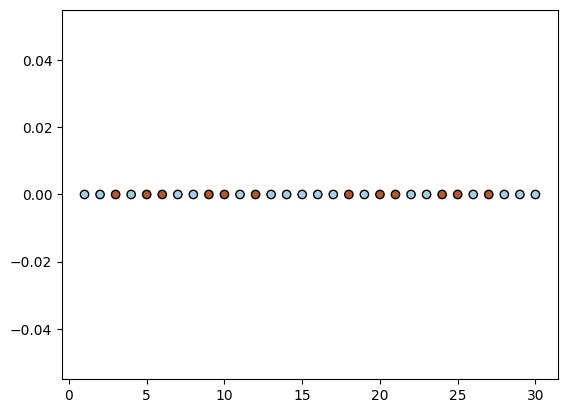

In [3]:
data = np.array([
     1, 2, 3, 4, 5, 6, 7, 8, 9,10,
    11,12,13,14,15,16,17,18,19,20,
    21,22,23,24,25,26,27,28,29,30
])
target = np.array([
     0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
     0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
     1, 0, 0, 1, 1, 0, 1, 0, 0, 0
])

ax = plt.gca()
plt.scatter(data, np.zeros_like(data), c=target, cmap=plt.cm.Paired, edgecolors='k');



**Is this data linearly separable?**

YOUR ANSWER HERE.
Yes this data is linearly separable because you can add a dimension and use the Z axis to seperate the 2 sets of data.

The following code converts `data` into an Nx2 array (`new_data`)
with the values from `data` in the first column
and zeros in the second column:

In [4]:
new_data = np.copy(data).reshape(data.size,1)
new_data = np.concatenate( (new_data, np.zeros_like(new_data)), axis=1 )

Now that we have two-dimensional data,
we have an extra *degree of freedom* (the y-coordinate)
that we can use to make our data linearly separable.

The following function will be used
to calculate a new y-coordinate
from the given x-coordinate.
It will be used automatically
in the code that follows.

Study the original data,
and figure out a transformation
that will make the new data linearly separable.
(*Hint: The data has a pattern very similar to one you've seen before...*)

**Fill in the missing implementation with your transformation.**

In [47]:
def y_coord_for_x_coord(x_coord):
    # this function takes a scalar and returns a scalar
    return x_coord.reshape(-1, 1)

Now we'll apply your transformation to `new_data`:

In [48]:
for r_idx in range(new_data.shape[0]):
    new_data[r_idx,1] = y_coord_for_x_coord(new_data[r_idx,0])

/tmp/ipykernel_29565/1965044256.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  new_data[r_idx,1] = y_coord_for_x_coord(new_data[r_idx,0])


and see how well it works:

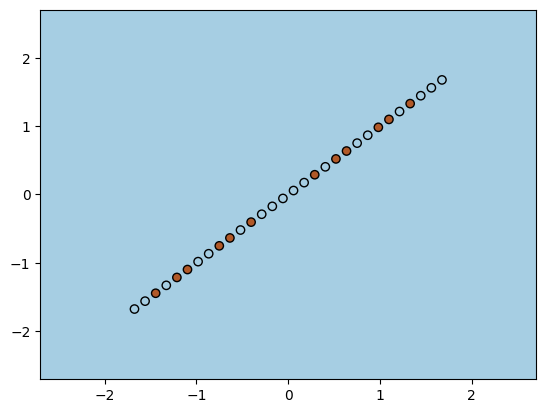

In [49]:
scaler = preprocessing.StandardScaler().fit(new_data)
new_data_scaled = scaler.transform(new_data)

clf = svm.SVC(kernel='linear')
clf.fit(new_data_scaled, target);

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    new_data_scaled,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto"
)
plt.scatter(new_data_scaled[:,0], new_data_scaled[:,1], c=target, cmap=plt.cm.Paired, edgecolors='k')
plt.axis('tight')
plt.show()